<a href="https://colab.research.google.com/github/RozenkovAndrey/projects_of_yandex_practicum/blob/main/SQL_project_books/SQL_project_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Что нужно учесть для создания нового сервиса и увеличения прибыли компании?Анализирую базы данных сервиса для чтения книг по подписке

# Описание проекта

Короновирус изменил мышление людей и позволил быстрее адаптировать технологии для удалённой работы, где это возможно. У людей появилось больше времени. Раньше многие тратили время на дорогу, а теперь могут потратить на чтение книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Ваша компания решила быть на волне и заработать, провела custdev пользователей сервисов по чтению книг, проанализировала бизнес и финансовую модели, финансовую отчётность сервиса для чтения книг по подписке и купила его. 

По определению стартап — это новый финансовый проект, цель которого — быстро окупить вложенные инвестиции и получить прибыль. Ваша первая задача как аналитика — проанализировать базу данных для ответа на вопросы, которые помогут повысить прибыль компании. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель:**
Проанализировать базу данных крупного сервиса для чтения книг по подписке.

**Задачи по проекту:**

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключить из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [ ]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

query = '''SELECT * FROM books''' 

# чтобы выполнить SQL-запрос, используем Pandas
books = pd.io.sql.read_sql(query, con = engine)

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

https://concrete-web-bad.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F069818d1-0e5c-4d87-a461-0de584ab9c33%2FUntitled_(33).png?id=bd53c8db-b4fd-49eb-8cc9-572ebb3c9163&table=block&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&width=2000&userId=&cache=v2

### Как выполнить задание?

- Опишите цели исследования;
- Исследуйте таблицы — выведите первые строки;
- Сделайте по одному SQL-запросу для решения каждого задания;
- Выведите результат каждого запроса в тетрадке;
- Опишите выводы по каждой из решённых задач.

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

# Задание 1

Посчитайте, сколько книг вышло после 1 января 2000 года;

In [ ]:
sql = '''
SELECT * FROM books 
  '''
pd.io.sql.read_sql(sql, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [ ]:
sql1 = '''
SELECT 
  COUNT(book_id) 
  FROM books
  WHERE publication_date > '2000-01-01'
  '''
     
pd.io.sql.read_sql(sql1, con = engine)

,count
0,819


**Вывод:** После 1 января 2000 года в каталог сервиса было добавлено 819 книг и брошюр.

# Задание 2

Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [ ]:
sql2 = '''
SELECT 
b.book_id, 
b.title,
COUNT(DISTINCT re.review_id) as review_cnt,
ROUND(AVG(r.rating),2) as middle_mark 
FROM books as b 
LEFT JOIN reviews as re ON b.book_id = re.book_id
LEFT JOIN ratings as r ON b.book_id = r.book_id
GROUP BY b.book_id, b.title
ORDER BY review_cnt DESC
'''
# Вывожу датасет с количеством обзоров и средней оценкой
ab = pd.io.sql.read_sql(sql2, con = engine)
ab

,book_id,title,review_cnt,middle_mark
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,808,The Natural Way to Draw,0,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,221,Essential Tales and Poems,0,4.00


**Расчёт среднего последний семи значений для review_cnt с пропусками нулями**<a class="anchor" id="second-bullet"></a> 

In [ ]:
# Считаю среднее послених 7 строк, где должны быть пропуски вместо нулей
f1 = ab.tail(7)
f1.review_cnt.mean()

0.14285714285714285

In [ ]:
# Вывожу последние 7 строк
f1

,book_id,title,review_cnt,middle_mark
993,510,Phantom (Sword of Truth #10),1,3.50
994,387,Leonardo's Notebooks,0,4.00
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,808,The Natural Way to Draw,0,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,221,Essential Tales and Poems,0,4.00
999,191,Disney's Beauty and the Beast (A Little Golden...,0,4.00


**Ниже можно увидеть, что нет значений для review_id для названий книг** <a class="anchor" id="first-bullet"></a>

In [ ]:
# Вывожу таблицу с названием книг и обзорами, где нет совпадений
sql2 = '''
SELECT 
b.book_id, 
b.title,
re.review_id
FROM books as b 
LEFT JOIN reviews as re ON b.book_id = re.book_id
WHERE text IS NULL
'''
ac = pd.io.sql.read_sql(sql2, con = engine)
ac

,book_id,title,review_id
0,191,Disney's Beauty and the Beast (A Little Golden...,None
1,672,The Cat in the Hat and Other Dr. Seuss Favorites,None
2,83,Anne Rice's The Vampire Lestat: A Graphic Novel,None
3,221,Essential Tales and Poems,None
4,387,Leonardo's Notebooks,None
5,808,The Natural Way to Draw,None


In [ ]:
# Заменяю нули на пропуски
for k,i in enumerate(list(ab['book_id'])):
  for j in list(ac['book_id']):
    if i == j:
      ab['review_cnt'] = ab['review_cnt'].replace(0, np.NaN)
    else:
      continue

In [ ]:
ab

,book_id,title,review_cnt,middle_mark
0,948,Twilight (Twilight #1),7.0,3.66
1,963,Water for Elephants,6.0,3.98
2,734,The Glass Castle,6.0,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6.0,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6.0,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,NaN,3.67
996,808,The Natural Way to Draw,NaN,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.00
998,221,Essential Tales and Poems,NaN,4.00


In [ ]:
# Проверяю количество пропусков
ab.review_cnt.isna().sum()

6

**Расчёт среднего последних семи значений для столбца review_cnt с пропусками-пропусками**<a class="anchor" id="third-bullet"></a>

In [ ]:
# Вывожу последние 7 строк с пропусками и считаю их среднее
f2 = ab.tail(7)
f2.review_cnt.mean()

1.0

In [ ]:
f2

,book_id,title,review_cnt,middle_mark
993,510,Phantom (Sword of Truth #10),1.0,3.50
994,387,Leonardo's Notebooks,NaN,4.00
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,NaN,3.67
996,808,The Natural Way to Draw,NaN,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.00
998,221,Essential Tales and Poems,NaN,4.00
999,191,Disney's Beauty and the Beast (A Little Golden...,NaN,4.00


In [ ]:
# Смотрю количество уникальных значений с обзорами
sql2 = '''
SELECT COUNT(DISTINCT book_id) FROM reviews
'''

pd.io.sql.read_sql(sql2, con = engine)

,count
0,994


In [ ]:
# Смотрю количество уникальных значений с оценками 
sql2 = '''
SELECT COUNT(DISTINCT book_id) FROM ratings
'''
pd.io.sql.read_sql(sql2, con = engine)

,count
0,1000


In [ ]:
# Смотрю уникальные значения book_id в таблице books
sql2 = '''
SELECT COUNT(DISTINCT book_id) FROM books
'''
pd.io.sql.read_sql(sql2, con = engine)

,count
0,1000


In [ ]:
# Cмотрю количество обзоров
ab.review_cnt.value_counts()

2.0    444
3.0    277
4.0    160
5.0     60
1.0     37
6.0     15
7.0      1
Name: review_cnt, dtype: int64

Text(0, 0.5, 'Количество')

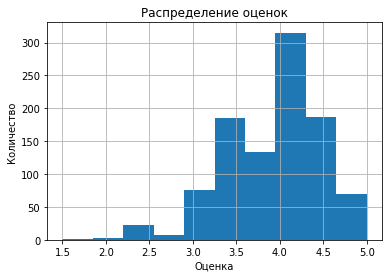

In [ ]:
# Смотрю распределение оценок
ab.middle_mark.hist()
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество')

In [ ]:
# Кореляция между оценками и количествами обзоров
ab.middle_mark.corr(ab.review_cnt)

0.019112604249402018

In [ ]:
# Смотрю книги с лучшими оценками
ab.sort_values(by = 'middle_mark', ascending = False).head(10)

,book_id,title,review_cnt,middle_mark
940,967,Welcome to Temptation (Dempseys #1),2.0,5.0
300,553,School's Out—Forever (Maximum Ride #2),3.0,5.0
943,972,Wherever You Go There You Are: Mindfulness Me...,2.0,5.0
709,418,March,2.0,5.0
710,421,Marvel 1602,2.0,5.0
717,441,Misty of Chincoteague (Misty #1),2.0,5.0
726,459,My Name Is Asher Lev,2.0,5.0
730,469,Neil Gaiman's Neverwhere,2.0,5.0
748,513,Piercing the Darkness (Darkness #2),2.0,5.0
749,516,Plum Island (John Corey #1),2.0,5.0


**Вывод:** Между оценками и количеством обзоров нет прямой корреляции

**Вывод:** Всего в каталоге 1000 книг. Количество обзоров варьируется от 7 до полного их осутствия. Средний рейтинг каждой книги представлен в результате запроса выше. Можно отметить, что количество обзоров на книгу не коррелирует с средним рейтингом, т.к. речь идет исключительно о вкусовых предпочтениях пользователей. Некоторые названия книг с лучшими оценками:Welcome to Temptation (Dempseys #1), March и Marvel 1602, но возможно есть связь между количеством оценов и средней оценкой, поскольку вкусы разные. 	

# Задание 3

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

|Наименование необходимого для запроса|Таблица и поле откуда можно взять|
| --------------------------------------- |:-------------:|
|Количество книг|books, book_id|
|Число страниц больше 50|books, num_pages|
|Издательство|publishers, publisher(publisher_id)|

- Ссылка с ER-диаграммой связи таблиц 

https://drive.google.com/file/d/1294KgV1ZvJrajdXWkNJwJKWambKwkpnR/view?usp=share_link

In [ ]:
sql3 = '''
-- нахожу издательство и id --
SELECT * 
FROM publishers
WHERE publisher IN
-- нахожу издательство --
(SELECT publisher FROM
-- исключаем брошюры --
(SELECT * 
FROM publishers p
JOIN books b ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50) t1
GROUP BY publisher
ORDER BY COUNT(book_id) DESC
LIMIT 1)
'''

pd.io.sql.read_sql(sql3, con = engine)

,publisher_id,publisher
0,212,Penguin Books


**Вывод:** Наиболее широко представлены книги (из анализа исключены брошюры с 50-ю и меньше страницами) издательства Penguin Books.

Издательство выпускает такие бестселлеры как Приключения Шерлока Холмса Артура Конан Дойла, Зелёная миля Стивена Кинга, Мартин Иден Джека Лондона, Гордость и предубеждение Джейн Остин, Мастер и Маргарита Михаила Булгакова. Однако, книги в основном на английском языке и нужно учитывать целевую аудиторию. По многим из этих книг сняты фильмы, возможно, поэтому они так популярны.

# Задание 4

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [ ]:
sql4 = '''

-- нахожу id книг, где количество оценок больше или равно 50 --
WITH id_books_more_then_50_marks AS
(SELECT book_id FROM
(SELECT b.book_id, COUNT(rating_id) as cnt
FROM books as b
JOIN ratings as r ON b.book_id = r.book_id
GROUP BY b.book_id
HAVING COUNT(rating_id) >= 50) t1) 


-- нахожу средний рейтинг книг авторов, сортирую авторов по убыванию среднего рейтинга и вывожу первого --
SELECT author, ROUND(AVG(rating),4) as avg_rating FROM
(
-- нахожу авторов, рейтинги их книг и фильтрую их по id книг в таблице id_books_more_then_50_marks --
SELECT a.author, r.rating, b.book_id
FROM books AS b
JOIN authors AS a
ON b.author_id = a.author_id
JOIN ratings as r
ON b.book_id = r.book_id
WHERE b.book_id IN
(SELECT * 
FROM id_books_more_then_50_marks)
) t1
GROUP BY author
ORDER BY avg_rating DESC
LIMIT 1
'''
pd.io.sql.read_sql(sql4, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.2871


**Вывод:** Самые популярный авторы с средним рейтингом в 4.2871 баллов из 5 - это  Джоан Роулинг (Книги Д.Роулинг о Гарри Поттере были переведены на 65 языков мира. Суммарный тираж продаж превысил 450 млн экземпляров)


Также нельзя забывать про её медийность. После раскрытия псевдонима Д.Роулинг объем продаж её дебютного романа тут же увеличился на около 4 000 %.

Возможно, есть смысл ориентироваться на детсткую аудиторию и вкладываться в маркетинг соответствующих произведений.

# Задание 5

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [ ]:
sql5 = '''
-- нахожу издательство и id --

SELECT COUNT(DISTINCT re.text)/ COUNT(DISTINCT re.username) AS avg_re_cnt
FROM ratings AS r
JOIN reviews AS re
ON r.username = re.username

WHERE r.username IN
-- нахожу пользователей, у которых количество оценок больше 50 --
(SELECT username
FROM ratings
GROUP BY username
HAVING COUNT(rating_id) > 50)
'''
pd.io.sql.read_sql(sql5, con = engine)

,avg_re_cnt
0,24


# Общий вывод и рекомендации

**Общий вывод:**

После 1 января 2000 года в каталог сервиса было добавлено 819 книг и брошюр.
Насколько это хорошо или плохо судить сложно без анализа финансовой отчётности и дополнительных данных.

Между оценками и количеством обзоров нет прямой корреляции, это означает что мнения пользователей и критиков нужно разделять и смотреть связи между оценками и выручкой с книг и оценкой критиков и выручкой с книг, например, по месяцам или ввести дополнительные метрики, например, средний чек или другое.

Всего в каталоге 1000 книг. Количество обзоров варьируется от 7 до полного их отсутствия. Некоторые названия книг с лучшими оценками: Welcome to Temptation (Dempseys #1), March и Marvel 1602, но возможно есть связь между количеством оценок и средней оценкой, поскольку вкусы разные. Хорошо бы посмотреть на корреляции среднего чека и возраста пользователя, жанров произведений, но такой информации в данных нет.

Наиболее широко представлены книги издательства Penguin Books.
Издательство выпускает такие бестселлеры как Приключения Шерлока Холмса Артура Конан Дойла, Зелёная миля Стивена Кинга, Мартин Иден Джека Лондона, Гордость и предубеждение Джейн Остин, Мастер и Маргарита Михаила Булгакова. Однако, книги в основном на английском языке и нужно учитывать целевую аудиторию. По многим из этих книг сняты фильмы, возможно, поэтому они так популярны.

Самые популярный авторы с средним рейтингом в 4.2871 баллов из 5 - это Джоан Роулинг (Книги Д.Роулинг о Гарри Поттере были переведены на 65 языков мира. Суммарный тираж продаж превысил 450 млн экземпляров)
Также нельзя забывать про её медийность. Возможно, есть смысл ориентироваться на детскую аудиторию и вкладываться в маркетинг соответствующих произведений и учитывать известность авторов.

Среднее количество обзоров от активных пользователей с более 50 оценками книг - 24. Однако этот факт требует перепроверки, поскольку уникальных имён - 160 и нет user_id, чтобы распознать конкретного пользователя.

**Рекомендации:**

1)	При выборе книг для сервиса учитывать известность авторов, сняты ли фильмы по книге, целевую аудиторию (выкладывать книги на английском или русском, возрастные когорты).

2)	Есть книги, которые не популярны и не будут иметь широкого коммерческого успеха, но необходимы обществу. Например, учебники для подготовки к ЕГЭ по предметам. Сборников достаточно много, но чтобы реально подготовиться, нужно прочитать их достаточно много и уметь выделять и структурировать информацию. Неплохо получается это делать у методистов из Яндекс.Практикум. Возможно, привлечь инвестиции со стороны государства и заинтересовать методистов с Яндекса, например, по программам Старт-1 до 4 млн руб. и создать материалы для подготовки. 

3)	Использовать современные технологии для создания книг, например, ChatGPT. В последнем финале бизнес уикенд марафоне как раз победил проект с подобной спецификой.
